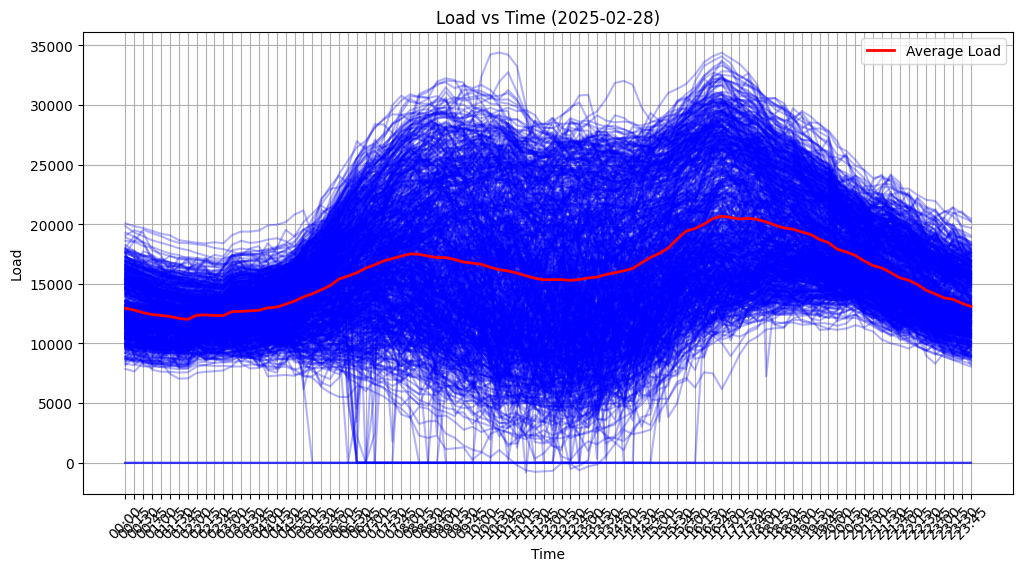

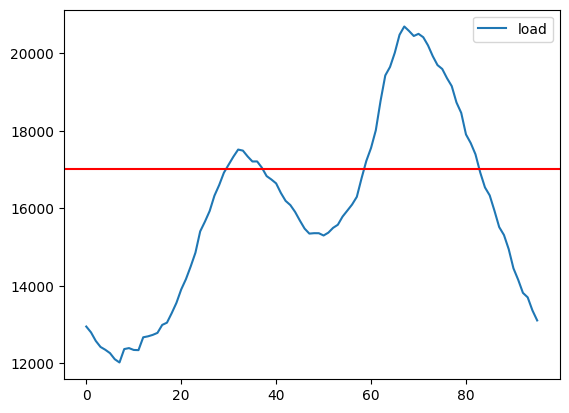

In [2]:
import matplotlib.pyplot as plt
from elia_hackaton.config import DATA_DIR
data_example = DATA_DIR / 'load/24917.csv'
from elia_hackaton.core.plot import plot_load_vs_time

period='day'
constant = 17000
avg_load = plot_load_vs_time(data_example, period=period)
avg_load.plot()
plt.axhline(y = constant, color = 'r', linestyle = '-')

Number of peaks: 4


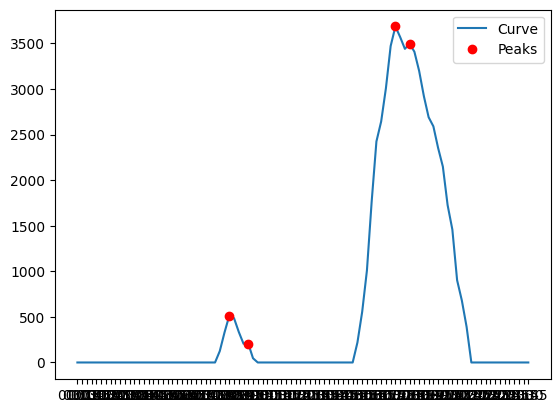

In [8]:
from scipy.signal import find_peaks

# Detect peaks
peaks, _ = find_peaks(avg_load['load'])

# Count peaks
num_peaks = len(peaks)

print(f"Number of peaks: {num_peaks}")

# Optionally, plot to visualize peaks
import matplotlib.pyplot as plt

plt.plot(avg_load['time'], avg_load['load'], label="Curve")
plt.plot(avg_load['time'][peaks], avg_load['load'][peaks], "ro", label="Peaks")  # Mark peaks
plt.legend()
plt.show()

<Axes: xlabel='time'>

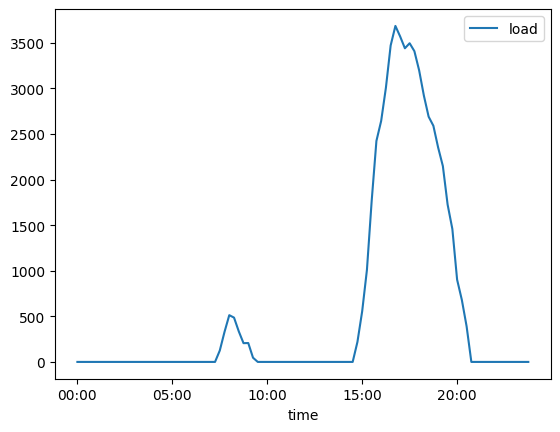

In [3]:
from elia_hackaton.core.plot import curve_above_constant, calculate_area, add_time_increment_column
   
avg_load, increment = add_time_increment_column(avg_load, period=period)
 
sup_load_df = curve_above_constant(avg_load, 'load', constant)
sup_load_df.plot(x='time', y='load')

In [4]:
calculate_area(sup_load_df, 'load', increment)

np.float64(14004.223873134326)

In [5]:
avg_load

,time,load,time_increment,increment_times_line
0,00:00,0.0,0 days 00:15:00,0 days 00:00:00
1,00:15,0.0,0 days 00:15:00,0 days 00:15:00
2,00:30,0.0,0 days 00:15:00,0 days 00:30:00
3,00:45,0.0,0 days 00:15:00,0 days 00:45:00
4,01:00,0.0,0 days 00:15:00,0 days 01:00:00
...,...,...,...,...
91,22:45,0.0,0 days 00:15:00,0 days 22:45:00
92,23:00,0.0,0 days 00:15:00,0 days 23:00:00
93,23:15,0.0,0 days 00:15:00,0 days 23:15:00
94,23:30,0.0,0 days 00:15:00,0 days 23:30:00
